   Wavelength        I    step
0   545.47500  0.41742  0.0005
1   545.47505  0.41376     NaN
2   545.47510  0.41486     NaN
3   545.47515  0.41480     NaN
4   545.47520  0.41279     NaN


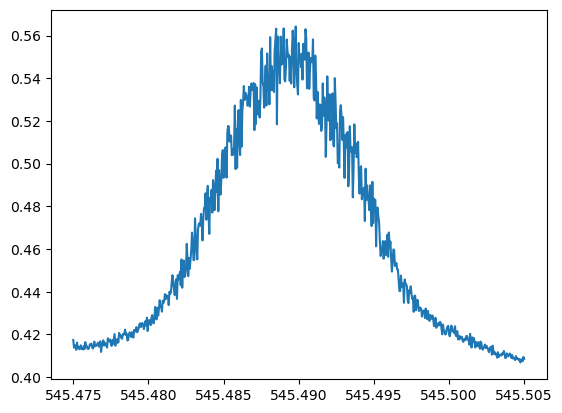

In [1]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df = pd.read_csv("Hg_Spectra_Step00005_546.csv") # create pandas dataframe
print(df.head()) # print first 5 rows

arr = df.to_numpy() # Change dataframe to numpy array


##############
# Plot data
##############

x = df["Wavelength"] # [int(start[0]):int(end[0])]
y = df["I"] # [int(start[0]):int(end[0])]
plt.plot(x, y)
plt.show()

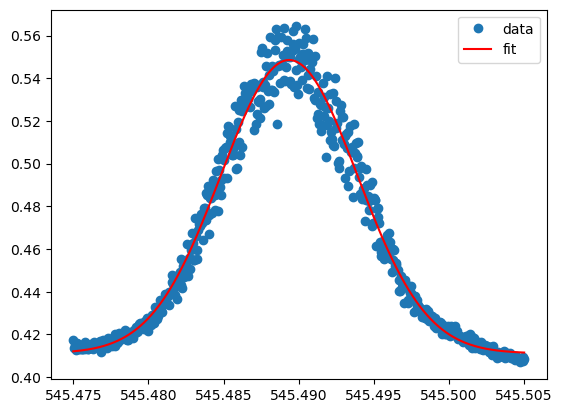

In [2]:
########################
# Input constant values
########################

a = 0.15 # amplitude                   
mean = 545.48 # middle of graph                 
h = 0.410 # vertical shift                  
sigma = 0.005 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x, a, mean, sigma, h):
    fit = a*np.exp((-(x-mean)**2)/(2*sigma**2)) + h
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt, pcov = curve_fit(gaus, x, y, p0=[a, mean, sigma, h]) # solves for a, mean, sigma, h
y_fit = gaus(x, *popt) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.plot(x, y, 'o', label="data")
plt.plot(x, y_fit, 'r-', label='fit')
plt.legend()
plt.show()

In [6]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt[0],
      "\n Fit Mean (Wavelength): ", popt[1],
      "\n Fit Sigma (distance from mean to sides): ", popt[2],
      "\n Fit Height: ", popt[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov)

Fit Amplitude:  0.1374077825298399 
 Fit Mean (Wavelength):  545.489360392636 
 Fit Sigma (distance from mean to sides):  0.004546355398897404 
 Fit Height:  0.41115081953339583

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 5.78102413e-07  5.21030425e-11  2.42053582e-09 -2.46379339e-07]
 [ 5.21030425e-11  5.83774479e-10  1.53713039e-12 -4.78731255e-11]
 [ 2.42053582e-09  1.53713039e-12  1.29501433e-09 -1.55651455e-08]
 [-2.46379339e-07 -4.78731255e-11 -1.55651455e-08  3.40888917e-07]]
